<a href="https://colab.research.google.com/github/pereruannabaala/Temperature_Conversion_ML/blob/main/Celsius_to_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [4]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [5]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model = tf.keras.Sequential([l0])

In [7]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


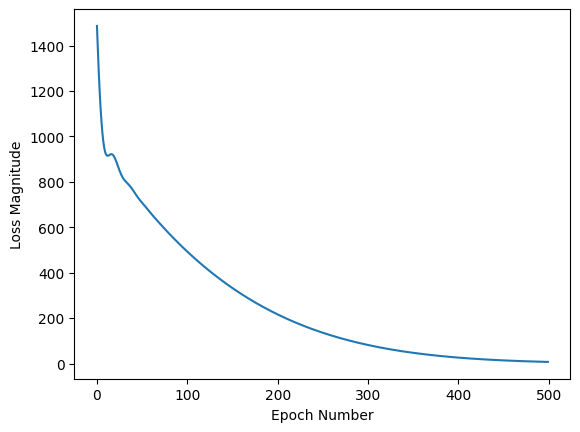

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [12]:
print(model.predict(np.array([100.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[211.33704]]


In [13]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8206697]], dtype=float32), array([29.270063], dtype=float32)]


In [16]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict(np.array([100.0]))) # Changed [100.0] to np.array([100.0])
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict(np.array([100.0])))) # Changed [100.0] to np.array([100.0])
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Finished training the model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[211.74744]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Model predicts that 100 degrees Celsius is: [[211.74744]] degrees Fahrenheit
These are the l0 variables: [array([[-0.44806296, -0.2574577 , -0.54935366, -0.08781105]],
      dtype=float32), array([-2.6893132, -3.0440311, -3.5266213,  3.1667087], dtype=float32)]
These are the l1 variables: [array([[ 0.27839565, -1.0452472 ,  0.7308519 , -0.6425451 ],
       [ 1.301047  ,  0.01203185, -0.5837499 ,  0.3410819 ],
       [ 1.3637564 ,  1.087775  , -0.23296845,  0.50817937],
       [-0.6563744 ,  0.9163333 , -1.4589266 ,  0.5626402 ]],
      dtype=float32), array([-3.5792065,  1.4916866, -1.7635074, -1.6929753], dtype=float32)]
These are the l2 variables: [array([[-1.6528856 ],
       [ 0.31364974],
       [-0.4407906 ],
       [ 0.02652152]], dtype=float32), array([3.3149657], dtype=float32)]
